<a href="https://colab.research.google.com/github/rashmi672/Pizza_Sales_Analysis_Using_SQL/blob/main/Pizza_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ipython-sql

In [ ]:
# Load the SQL extension
%load_ext sql

# Create a SQLite database
%sql sqlite://


/content/drive/MyDrive/ColabNotebooks/Pizza_Sales_Analysis

In [ ]:
%cd /content/drive/MyDrive/ColabNotebooks/Pizza_Sales_Analysis

/content/drive/MyDrive/ColabNotebooks/Pizza_Sales_Analysis


In [ ]:
%%sql
CREATE TABLE orders (
    order_id INT NOT NULL,
    order_date DATE NOT NULL,
    order_time TIME NOT NULL,
    PRIMARY KEY (order_id)
);

 * sqlite://
Done.


[]

In [ ]:
%%sql
SELECT * FROM orders;

 * sqlite://
Done.


order_id,order_date,order_time


In [ ]:
%%sql
CREATE TABLE orders_details (
    order_details_id INT NOT NULL,
    order_id INT NOT NULL,
    pizza_id INT NOT NULL,
    quantity INT NOT NULL,
    PRIMARY KEY (order_details_id)
);

 * sqlite://
Done.


[]

# Write the query and solve the questions.

## **Basic**:

1.   Retrieve the total number of orders placed.
2.   Calculate the total revenue generated from pizza sales.
3. Identify the highest-priced pizza.
4. Identify the most common pizza size ordered.
5. List the top 5 most ordered pizza types along with their quantities.

In [ ]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
orders_df = pd.read_csv('orders.csv')
order_details_df = pd.read_csv('order_details.csv')
pizza_df = pd.read_csv('pizza.csv')
pizza_type_df = pd.read_csv('pizza_type.csv', encoding='latin-1')

# Connect to SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Write DataFrames to SQLite tables
orders_df.to_sql('orders', conn, index=False, if_exists='replace')
order_details_df.to_sql('order_details', conn, index=False, if_exists='replace')
pizza_df.to_sql('pizza', conn, index=False, if_exists='replace')
pizza_type_df.to_sql('pizza_type', conn, index=False, if_exists='replace')


32

In [ ]:
## 1. Retrieve the total number of orders placed.
query1 = 'SELECT COUNT(order_id) AS total_orders FROM orders'
total_orders = pd.read_sql(query1, conn)
print(total_orders.to_string(index=False))



 total_orders
        21350


In [ ]:
## 2. Calculate the total revenue generated from pizza sales.
query2 = 'SELECT SUM(order_details.quantity * pizza.price) AS total_revenue FROM order_details JOIN pizza ON order_details.pizza_id = pizza.pizza_id'
total_revenue = pd.read_sql(query2, conn)
print(total_revenue.to_string(index=False))

 total_revenue
     817860.05


In [ ]:
## 3. Identify the highest-priced pizza.
query3 = 'SELECT pt.name, p.price FROM pizza_type pt JOIN pizza p ON pt.pizza_type_id = p.pizza_type_id ORDER BY price DESC'
highest_priced_pizza = pd.read_sql(query3, conn)
print(highest_priced_pizza.to_string(index=False))

           name  price
The Greek Pizza  35.95


size  count
   L  18526
   M  15385
   S  14137
  XL    544
 XXL     28


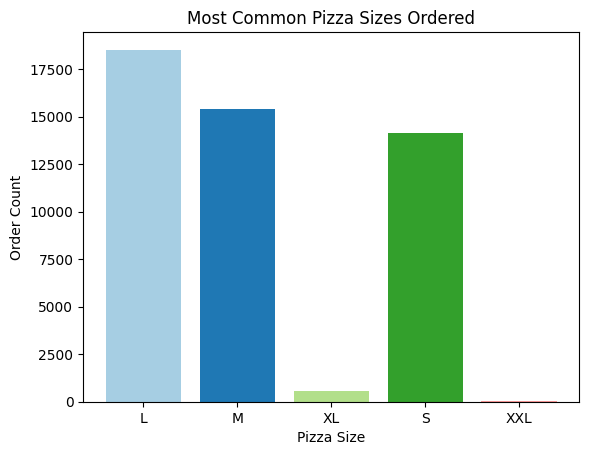

In [99]:
## 4. Identify the most common pizza size ordered.
query4 = 'SELECT size, COUNT(*) AS count FROM order_details od JOIN pizza p ON od.pizza_id = p.pizza_id GROUP BY size ORDER BY count DESC'
most_common_size = pd.read_sql(query4, conn)
print(most_common_size.to_string(index=False))

# Shuffle the DataFrame rows
most_common_size = most_common_size.sample(frac=1).reset_index(drop=True)
# Plotting the graph
colors = plt.cm.Paired(range(len(most_common_size)))
##plt.figure(figsize=(10, 6))
plt.bar(most_common_size['size'], most_common_size['count'], color=colors)
plt.xlabel('Pizza Size')
plt.ylabel('Order Count')
plt.title('Most Common Pizza Sizes Ordered')
plt.xticks(rotation=0)
plt.show()

In [48]:
## 5. List the top 5 most ordered pizza types along with their quantities.
query5 = 'SELECT pizza_type.name, SUM(order_details.quantity) AS total_quantity FROM order_details JOIN pizza ON order_details.pizza_id = pizza.pizza_id JOIN pizza_type ON pizza.pizza_type_id = pizza_type.pizza_type_id GROUP BY pizza_type.name ORDER BY total_quantity DESC LIMIT 5'
most_ordered_pizza_types = pd.read_sql(query5, conn)
print(most_ordered_pizza_types.to_string(index=False))

                      name  total_quantity
  The Classic Deluxe Pizza            2453
The Barbecue Chicken Pizza            2432
        The Hawaiian Pizza            2422
       The Pepperoni Pizza            2418
    The Thai Chicken Pizza            2371


## Intermediate:
1. Join the necessary tables to find the total quantity of each pizza category ordered.
2. Determine the distribution of orders by hour of the day.
3. Join relevant tables to find the category-wise distribution of pizzas.
4. Group the orders by date and calculate the average number of pizzas ordered per day.
5. Determine the top 3 most ordered pizza types based on revenue.

In [51]:
## 1. Join the necessary tables to find the total quantity of each pizza category ordered.
query_in_1 = 'SELECT pizza_type.category, SUM(order_details.quantity) AS total_quantity FROM order_details JOIN pizza ON order_details.pizza_id = pizza.pizza_id JOIN pizza_type ON pizza.pizza_type_id = pizza_type.pizza_type_id GROUP BY pizza_type.category'
total_quantity_per_category = pd.read_sql(query_in_1, conn)
print(total_quantity_per_category.to_string(index=False))

category  total_quantity
 Chicken           11050
 Classic           14888
 Supreme           11987
  Veggie           11649


In [54]:
## 2. Determine the distribution of orders by hour of the day.
query_in_2 = 'SELECT strftime("%H", time) AS hour_of_day, COUNT(order_id) AS order_count FROM orders GROUP BY hour_of_day ORDER BY order_count'
distribution_by_hour = pd.read_sql(query_in_2, conn)
print(distribution_by_hour.to_string(index=False))

hour_of_day  order_count
         09            1
         10            8
         23           28
         22          663
         21         1198
         11         1231
         15         1468
         14         1472
         20         1642
         16         1920
         19         2009
         17         2336
         18         2399
         13         2455
         12         2520


In [58]:
## 3. Join relevant tables to find the category-wise distribution of pizzas.
query_in_3 = 'SELECT pizza_type.category, COUNT(order_details.order_details_id) AS count FROM order_details JOIN pizza ON order_details.pizza_id = pizza.pizza_id JOIN pizza_type ON pizza.pizza_type_id = pizza_type.pizza_type_id GROUP BY pizza_type.category'
category_wise_distribution = pd.read_sql(query_in_3, conn)
print(category_wise_distribution.to_string(index=False))

category  count
 Chicken  10815
 Classic  14579
 Supreme  11777
  Veggie  11449


In [60]:
## 4. Group the orders by date and calculate the average number of pizzas ordered per day.
query_in_4 = 'SELECT strftime("%Y-%m-%d", date) AS date, round(AVG(quantity)) AS avg_pizzas_per_day FROM (SELECT orders.date, order_details.quantity FROM orders JOIN order_details ON orders.order_id = order_details.order_id) GROUP BY date'
avg_pizzas_per_day = pd.read_sql(query_in_4, conn)
print(avg_pizzas_per_day.to_string(index=False))

      date  avg_pizzas_per_day
2015-01-01                 1.0
2015-01-02                 1.0
2015-01-03                 1.0
2015-01-04                 1.0
2015-01-05                 1.0
2015-01-06                 1.0
2015-01-07                 1.0
2015-01-08                 1.0
2015-01-09                 1.0
2015-01-10                 1.0
2015-01-11                 1.0
2015-01-12                 1.0
2015-01-13                 1.0
2015-01-14                 1.0
2015-01-15                 1.0
2015-01-16                 1.0
2015-01-17                 1.0
2015-01-18                 1.0
2015-01-19                 1.0
2015-01-20                 1.0
2015-01-21                 1.0
2015-01-22                 1.0
2015-01-23                 1.0
2015-01-24                 1.0
2015-01-25                 1.0
2015-01-26                 1.0
2015-01-27                 1.0
2015-01-28                 1.0
2015-01-29                 1.0
2015-01-30                 1.0
2015-01-31                 1.0
2015-02-

In [61]:
## 5. Determine the top 3 most ordered pizza types based on revenue.
query_in_5 = 'SELECT pizza_type.name, SUM(order_details.quantity * pizza.price) AS total_revenue FROM order_details JOIN pizza ON order_details.pizza_id = pizza.pizza_id JOIN pizza_type ON pizza.pizza_type_id = pizza_type.pizza_type_id GROUP BY pizza_type.name ORDER BY total_revenue DESC LIMIT 3'
top_3_most_ordered_pizza_types = pd.read_sql(query_in_5, conn)
print(top_3_most_ordered_pizza_types.to_string(index=False))

                        name  total_revenue
      The Thai Chicken Pizza       43434.25
  The Barbecue Chicken Pizza       42768.00
The California Chicken Pizza       41409.50


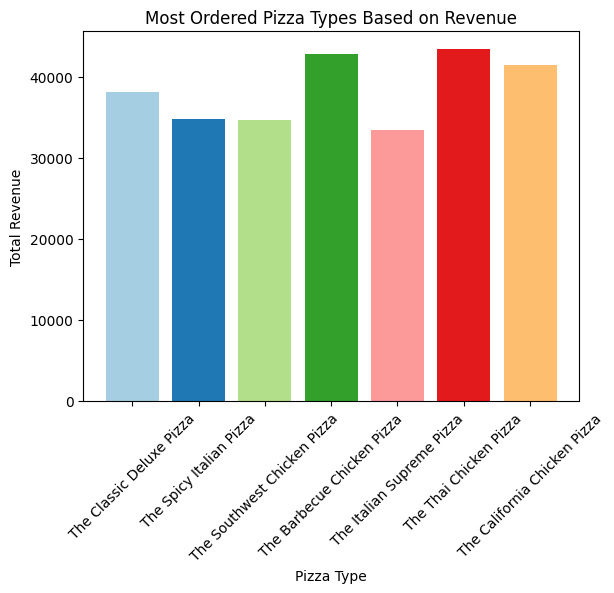

In [95]:
import matplotlib.pyplot as plt

# Query to verify the top 3 most ordered pizzas based on revenue using plot
query_in_5 = '''
SELECT pt.name, SUM(od.quantity * p.price) AS total_revenue
FROM order_details od
JOIN pizza p ON od.pizza_id = p.pizza_id
JOIN pizza_type pt ON p.pizza_type_id = pt.pizza_type_id
GROUP BY pt.name
ORDER BY total_revenue DESC
LIMIT 7
'''
top_7_most_ordered_pizza_types = pd.read_sql(query_in_5, conn)

# Shuffle the DataFrame rows
top_7_most_ordered_pizza_types = top_7_most_ordered_pizza_types.sample(frac=1).reset_index(drop=True)

# Plotting the graph
colors = plt.cm.Paired(range(len(top_7_most_ordered_pizza_types)))
#plt.figure(figsize=(10, 6))
plt.bar(top_7_most_ordered_pizza_types['name'], top_7_most_ordered_pizza_types['total_revenue'], color=colors)
plt.xlabel('Pizza Type')
plt.ylabel('Total Revenue')
plt.title('Most Ordered Pizza Types Based on Revenue')
plt.xticks(rotation=45)
plt.show()


## Advanced:
1. Calculate the percentage contribution of each pizza type to total revenue.
2. Analyze the cumulative revenue generated over time.
3. Determine the top 3 most ordered pizza types based on revenue for each pizza category.

In [76]:
## 1. Calculate the percentage contribution of each pizza type to total revenue.
query_adv_1 = 'SELECT pizza_type.name, SUM(order_details.quantity * pizza.price) AS total_revenue FROM order_details JOIN pizza ON order_details.pizza_id = pizza.pizza_id JOIN pizza_type ON pizza.pizza_type_id = pizza_type.pizza_type_id GROUP BY pizza_type.name'
pizza_type_revenue = pd.read_sql(query_adv_1, conn)
total_revenue = pizza_type_revenue['total_revenue'].sum()
pizza_type_revenue['percentage_contribution'] = pizza_type_revenue['total_revenue'] / total_revenue * 100
print(pizza_type_revenue.to_string(index=False))

                                      name  total_revenue  percentage_contribution
                The Barbecue Chicken Pizza       42768.00                 5.229257
                        The Big Meat Pizza       22968.00                 2.808304
                      The Brie Carre Pizza       11588.50                 1.416929
                       The Calabrese Pizza       15934.25                 1.948286
              The California Chicken Pizza       41409.50                 5.063152
                 The Chicken Alfredo Pizza       16900.25                 2.066399
                   The Chicken Pesto Pizza       16701.75                 2.042128
                  The Classic Deluxe Pizza       38180.50                 4.668341
                     The Five Cheese Pizza       26066.50                 3.187159
                     The Four Cheese Pizza       32265.70                 3.945137
                           The Greek Pizza       28454.10                 3.479092
    

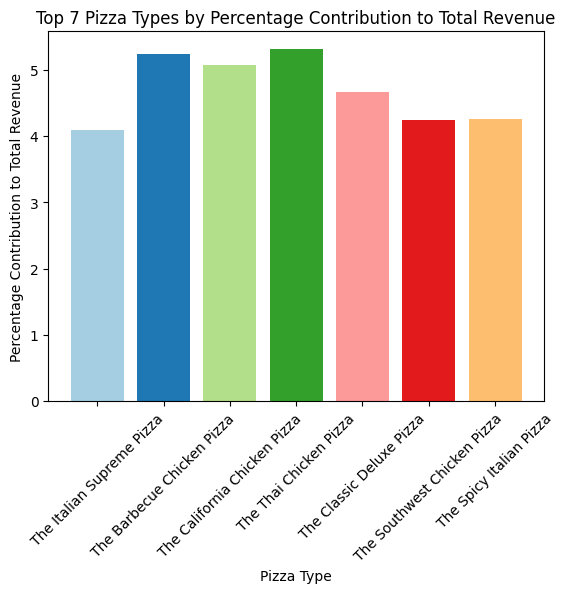

In [89]:
import matplotlib.pyplot as plt

# Query to verify the percentage contribution of each pizza type to total revenue using plot
query_adv_1 = '''
SELECT pt.name, SUM(od.quantity * p.price) AS total_revenue
FROM order_details od
JOIN pizza p ON od.pizza_id = p.pizza_id
JOIN pizza_type pt ON p.pizza_type_id = pt.pizza_type_id
GROUP BY pt.name
'''
pizza_type_revenue = pd.read_sql(query_adv_1, conn)
total_revenue = pizza_type_revenue['total_revenue'].sum()
pizza_type_revenue['percentage_contribution'] = pizza_type_revenue['total_revenue'] / total_revenue * 100

# Get the top 7 pizza types
top_7_pizza_types = pizza_type_revenue.nlargest(7, 'percentage_contribution')

# Shuffle the DataFrame rows
top_7_pizza_types = top_7_pizza_types.sample(frac=1).reset_index(drop=True)

# Plotting the graph
colors = plt.cm.Paired(range(len(top_7_pizza_types)))
#plt.figure(figsize=(10, 6))
plt.bar(top_7_pizza_types['name'], top_7_pizza_types['percentage_contribution'], color=colors)
plt.xlabel('Pizza Type')
plt.ylabel('Percentage Contribution to Total Revenue')
plt.title('Top 7 Pizza Types by Percentage Contribution to Total Revenue')
plt.xticks(rotation=45)
plt.show()


In [77]:
## 2. Analyze the cumulative revenue generated over time.
query_adv_2 = 'SELECT strftime("%Y-%m-%d", date) AS date, SUM(order_details.quantity * pizza.price) AS cumulative_revenue FROM orders JOIN order_details ON orders.order_id = order_details.order_id JOIN pizza ON order_details.pizza_id = pizza.pizza_id GROUP BY date'
cumulative_revenue = pd.read_sql(query_adv_2, conn)
print(cumulative_revenue.to_string(index=False))

      date  cumulative_revenue
2015-01-01             2713.85
2015-01-02             2731.90
2015-01-03             2662.40
2015-01-04             1755.45
2015-01-05             2065.95
2015-01-06             2428.95
2015-01-07             2202.20
2015-01-08             2838.35
2015-01-09             2127.35
2015-01-10             2463.95
2015-01-11             1872.30
2015-01-12             1919.05
2015-01-13             2049.60
2015-01-14             2527.40
2015-01-15             1984.80
2015-01-16             2594.15
2015-01-17             2064.10
2015-01-18             1976.85
2015-01-19             2387.15
2015-01-20             2397.90
2015-01-21             2040.55
2015-01-22             2496.70
2015-01-23             2423.70
2015-01-24             2289.25
2015-01-25             1617.55
2015-01-26             1884.40
2015-01-27             2528.05
2015-01-28             2016.00
2015-01-29             2045.30
2015-01-30             2270.30
2015-01-31             2417.85
2015-02-

In [78]:
## 3. Determine the top 3 most ordered pizza types based on revenue for each pizza category.
query_adv_3 = 'SELECT pizza_type.category, pizza_type.name, SUM(order_details.quantity * pizza.price) AS total_revenue FROM order_details JOIN pizza ON order_details.pizza_id = pizza.pizza_id JOIN pizza_type ON pizza.pizza_type_id = pizza_type.pizza_type_id GROUP BY pizza_type.category, pizza_type.name ORDER BY total_revenue DESC LIMIT 3'
top_3_most_ordered_pizza_types_per_category = pd.read_sql(query_adv_3, conn)
print(top_3_most_ordered_pizza_types_per_category.to_string(index=False))

category                         name  total_revenue
 Chicken       The Thai Chicken Pizza       43434.25
 Chicken   The Barbecue Chicken Pizza       42768.00
 Chicken The California Chicken Pizza       41409.50


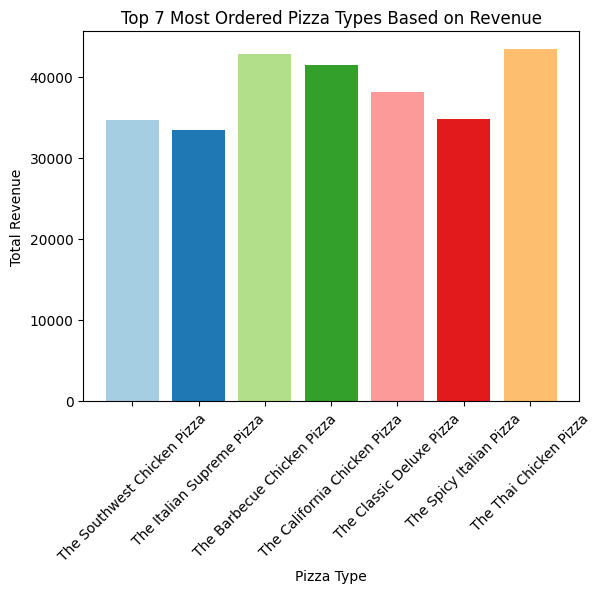

In [88]:
import matplotlib.pyplot as plt

# Query to get the top 7 most ordered pizzas based on revenue using plot
query_adv_7 = '''
SELECT pt.name, SUM(od.quantity * p.price) AS total_revenue
FROM order_details od
JOIN pizza p ON od.pizza_id = p.pizza_id
JOIN pizza_type pt ON p.pizza_type_id = pt.pizza_type_id
GROUP BY pt.name
ORDER BY total_revenue DESC
LIMIT 7
'''
top_7_most_ordered_pizza_types = pd.read_sql(query_adv_7, conn)

# Shuffle the DataFrame rows
top_7_most_ordered_pizza_types = top_7_most_ordered_pizza_types.sample(frac=1).reset_index(drop=True)

# Plotting the graph
colors = plt.cm.Paired(range(len(top_7_most_ordered_pizza_types)))
#plt.figure(figsize=(8, 4))
plt.bar(top_7_most_ordered_pizza_types['name'], top_7_most_ordered_pizza_types['total_revenue'], color=colors)
plt.xlabel('Pizza Type')
plt.ylabel('Total Revenue')
plt.title('Top 7 Most Ordered Pizza Types Based on Revenue')
plt.xticks(rotation=45)
plt.show()
